### Cross Validation - Carsales dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR

In [2]:
data = pd.read_csv('./Car_sales (1).csv')
data

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [4]:
data.shape

(157, 16)

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales_in_thousands,157.0,52.998076,68.029422,0.110000,14.114000,29.450000,67.956000,540.561000
__year_resale_value,121.0,18.072975,11.453384,5.160000,11.260000,14.180000,19.875000,67.550000
Price_in_thousands,155.0,27.390755,14.351653,9.235000,18.017500,22.799000,31.947500,85.500000
Engine_size,156.0,3.060897,1.044653,1.000000,2.300000,3.000000,3.575000,8.000000
Horsepower,156.0,185.948718,56.700321,55.000000,149.500000,177.500000,215.000000,450.000000
Wheelbase,156.0,107.487179,7.641303,92.600000,103.000000,107.000000,112.200000,138.700000
Width,156.0,71.150000,3.451872,62.600000,68.400000,70.550000,73.425000,79.900000
Length,156.0,187.343590,13.431754,149.400000,177.575000,187.900000,196.125000,224.500000
Curb_weight,155.0,3.378026,0.630502,1.895000,2.971000,3.342000,3.799500,5.572000
Fuel_capacity,156.0,17.951923,3.887921,10.300000,15.800000,17.200000,19.575000,32.000000


In [6]:
data.isnull().mean()*100

Manufacturer            0.000000
Model                   0.000000
Sales_in_thousands      0.000000
__year_resale_value    22.929936
Vehicle_type            0.000000
Price_in_thousands      1.273885
Engine_size             0.636943
Horsepower              0.636943
Wheelbase               0.636943
Width                   0.636943
Length                  0.636943
Curb_weight             1.273885
Fuel_capacity           0.636943
Fuel_efficiency         1.910828
Latest_Launch           0.000000
Power_perf_factor       1.273885
dtype: float64

In [7]:
data.fillna(data.mean(), inplace=True)
data

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360000,Passenger,21.500000,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875000,Passenger,28.400000,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225000,Passenger,27.390755,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,77.043591
3,Acura,RL,8.588,29.725000,Passenger,42.000000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255000,Passenger,23.990000,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,18.072975,Passenger,24.400000,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,18.072975,Passenger,27.500000,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,18.072975,Passenger,28.800000,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,18.072975,Passenger,45.500000,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [8]:
data.isnull().sum()

Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Latest_Launch          0
Power_perf_factor      0
dtype: int64

#### Univariate analysis

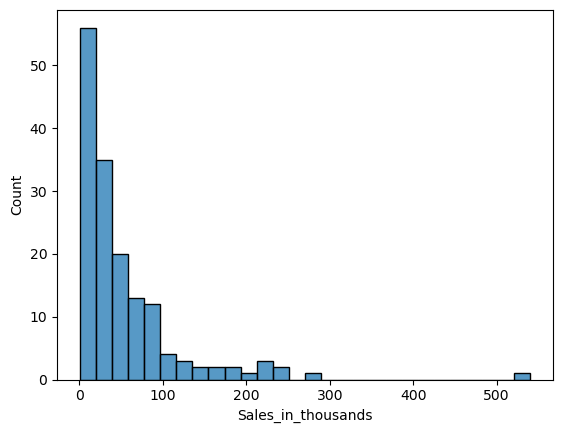

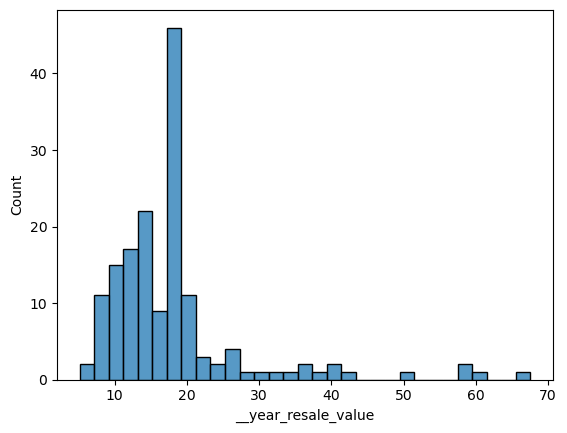

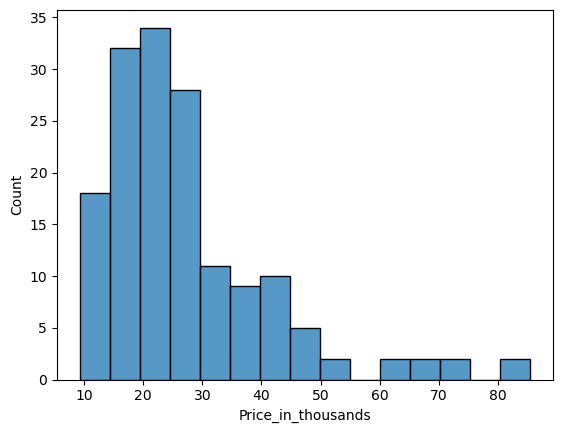

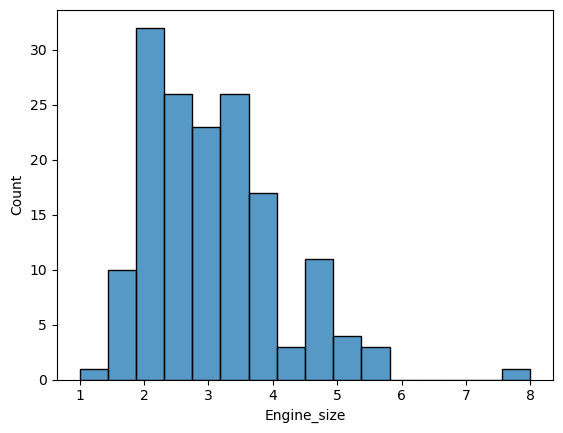

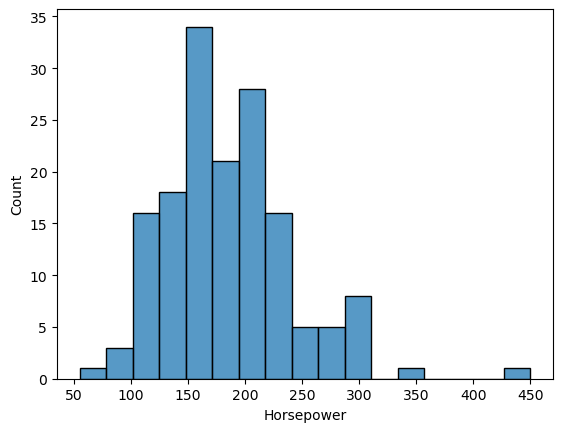

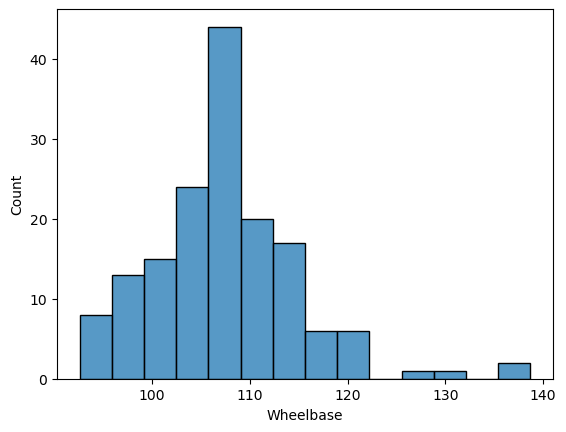

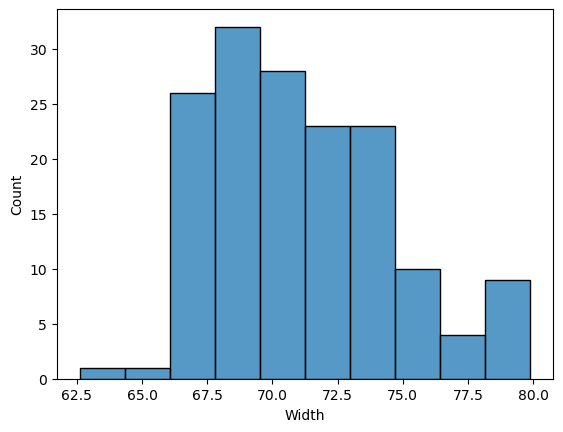

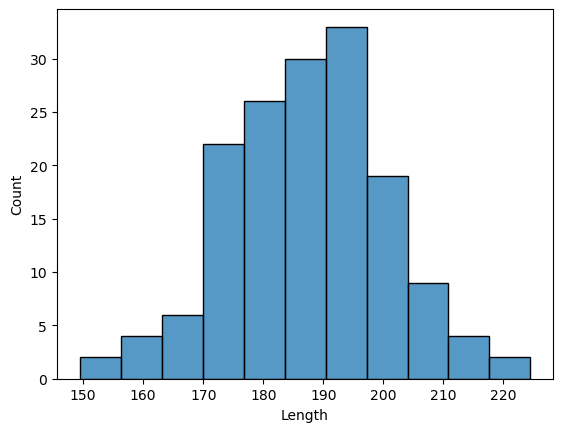

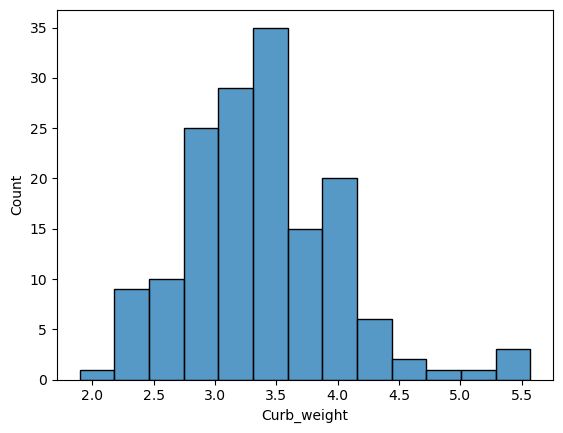

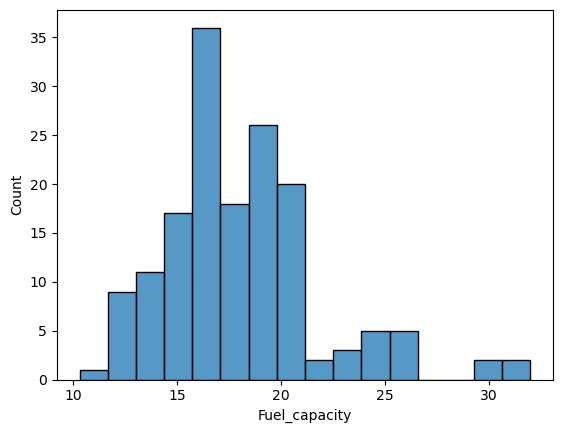

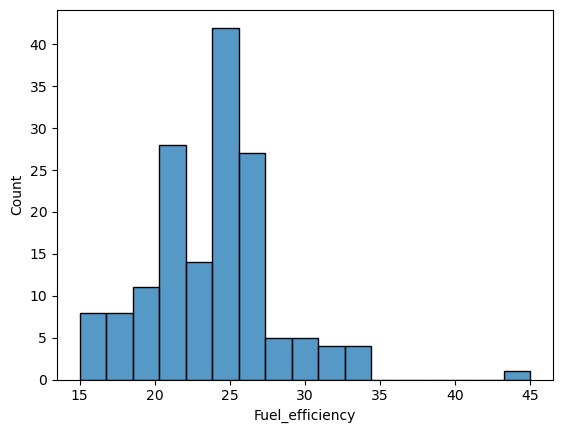

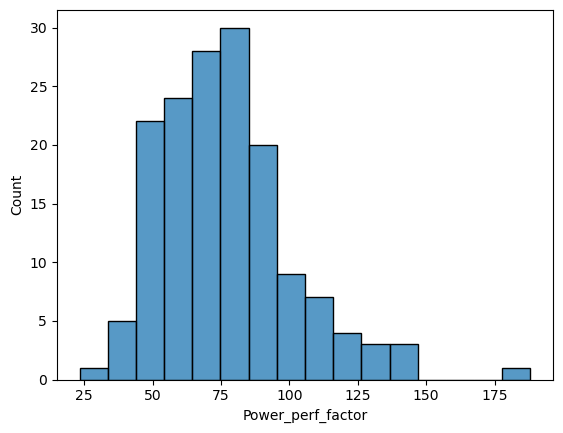

In [9]:
for i in data.columns:
    if data[i].dtypes != "object":
        sns.histplot(x = data[i] )
        plt.show()

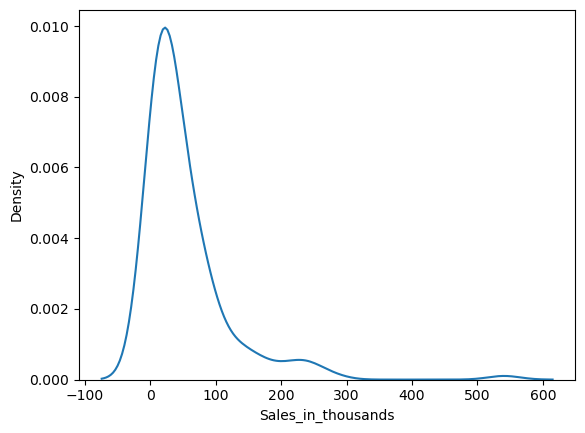

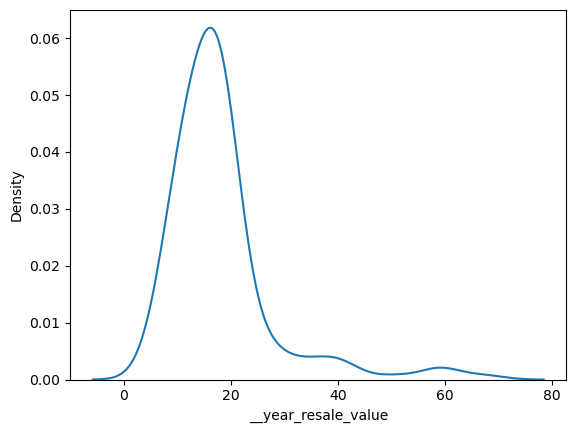

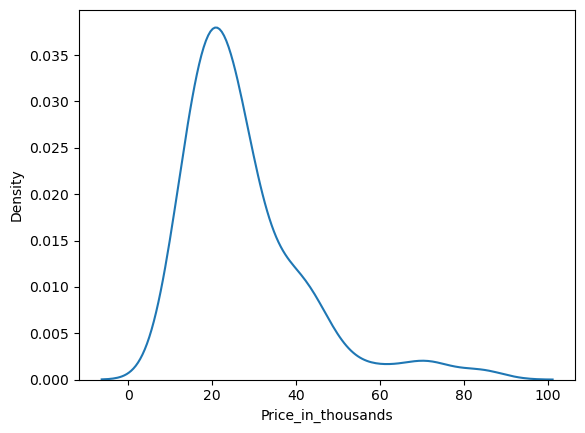

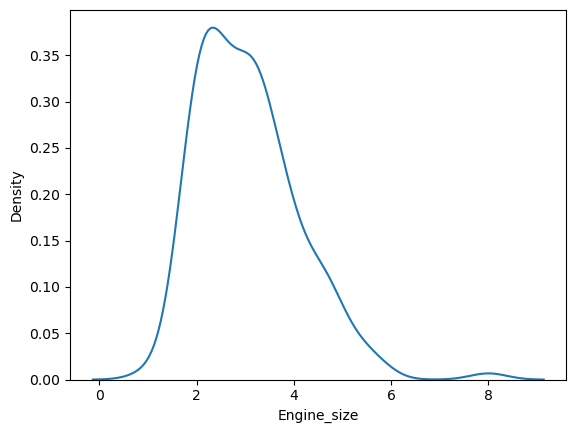

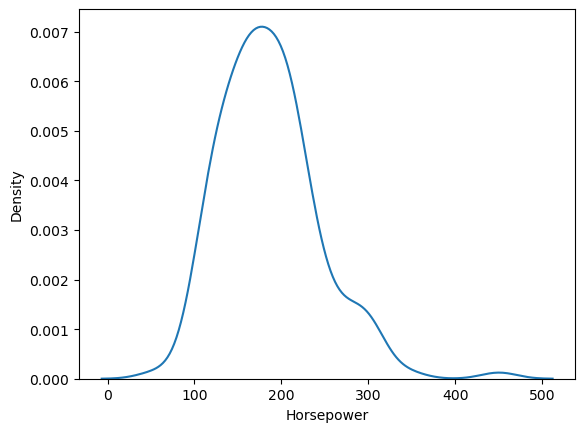

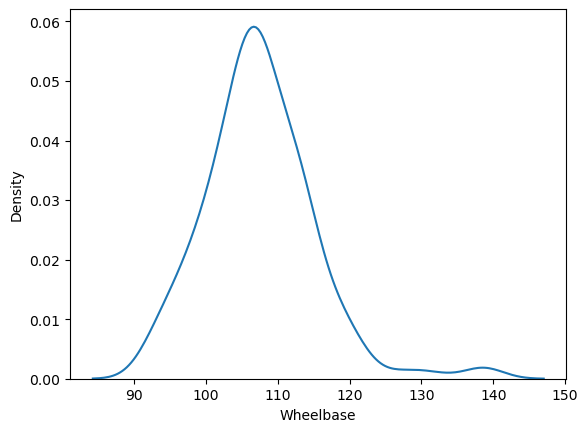

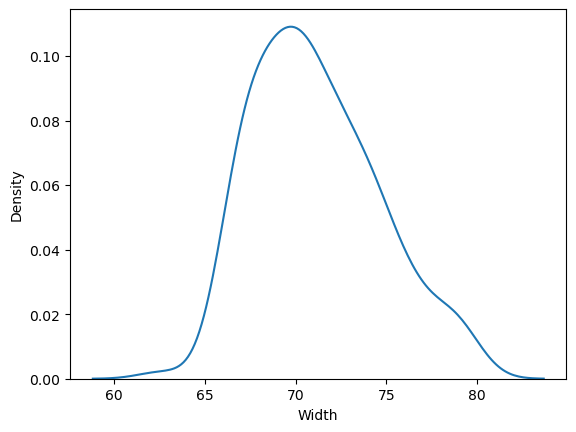

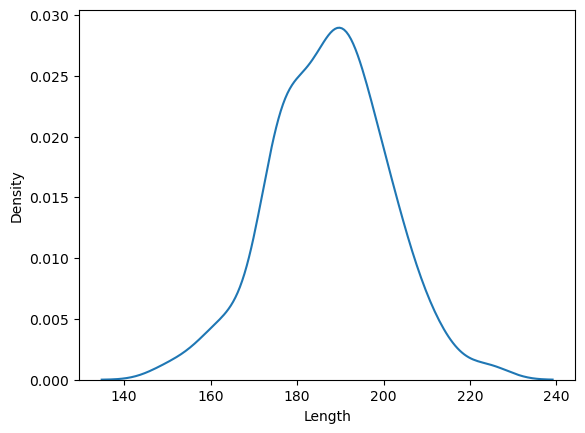

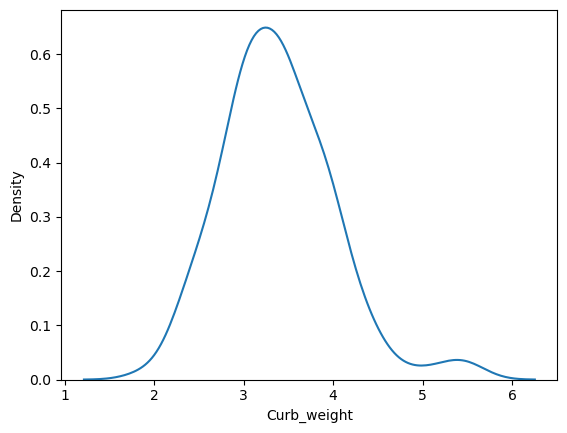

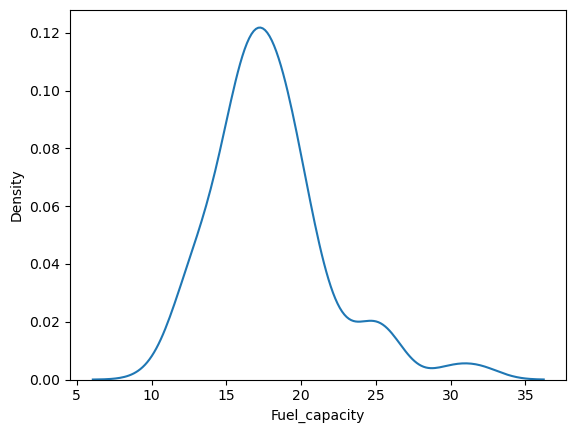

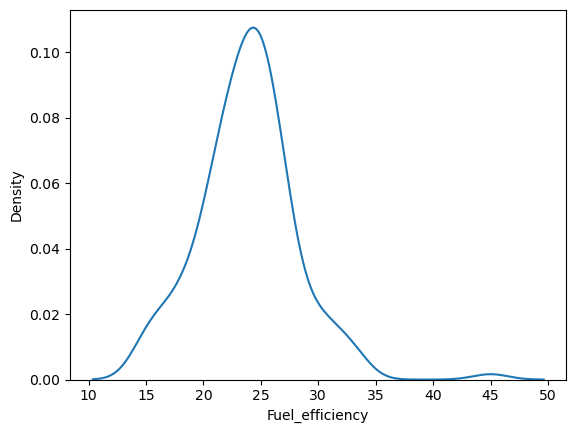

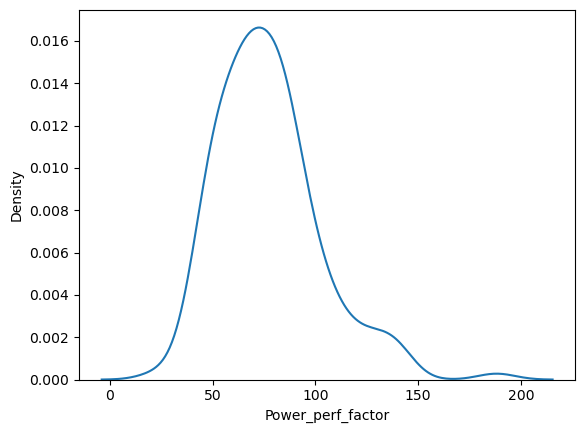

In [10]:
for i in data.columns:
    if data[i].dtypes != "object":
        sns.kdeplot(x = data[i] )
        plt.show()

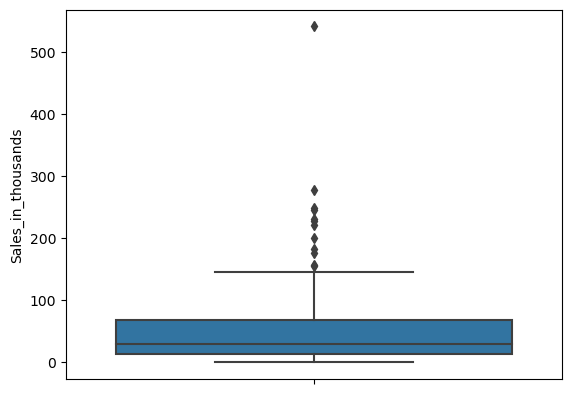

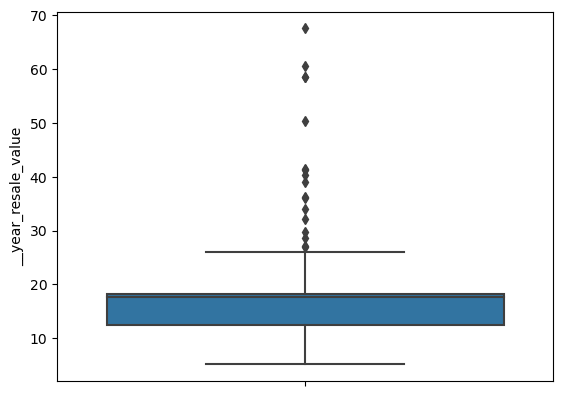

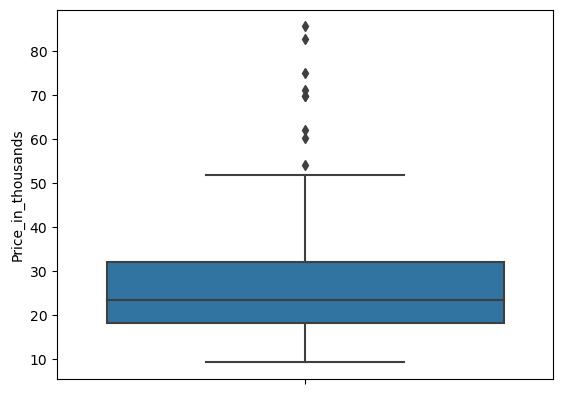

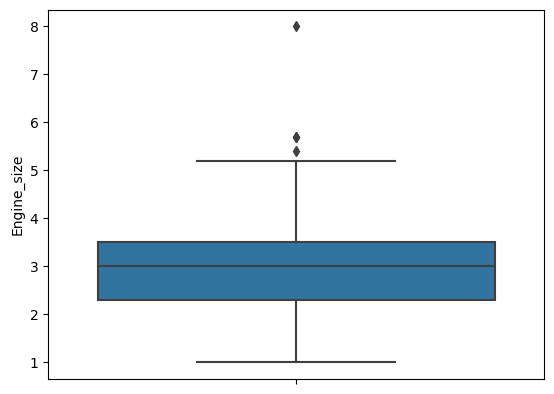

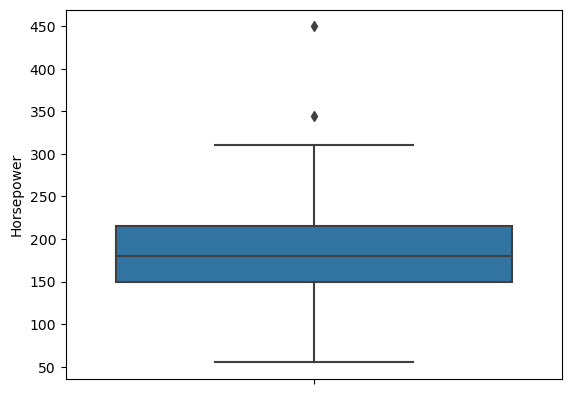

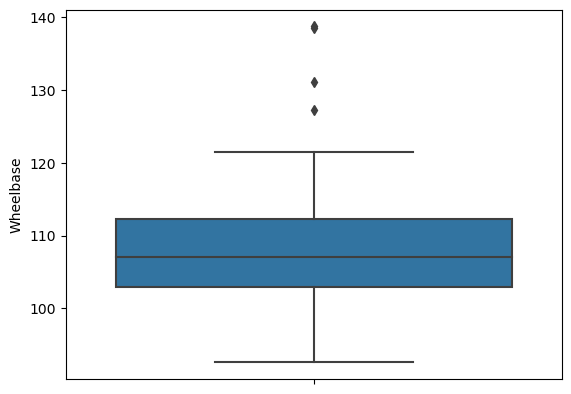

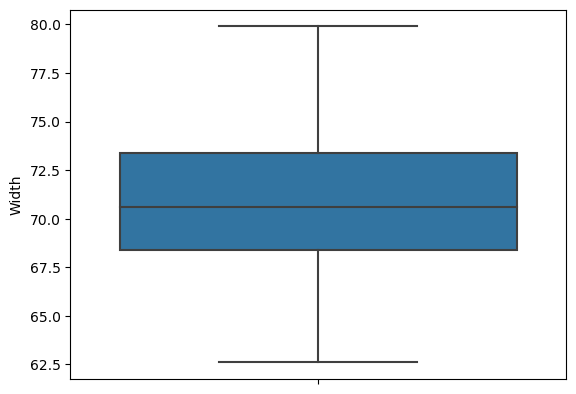

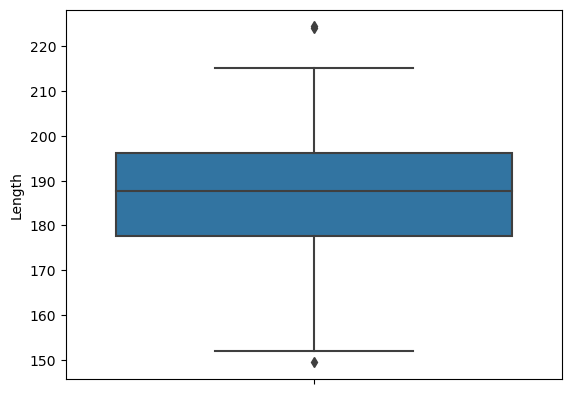

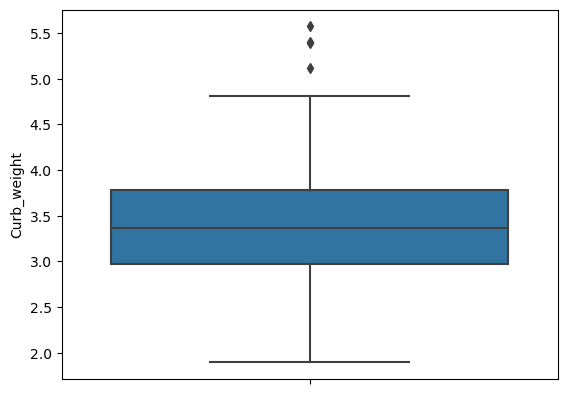

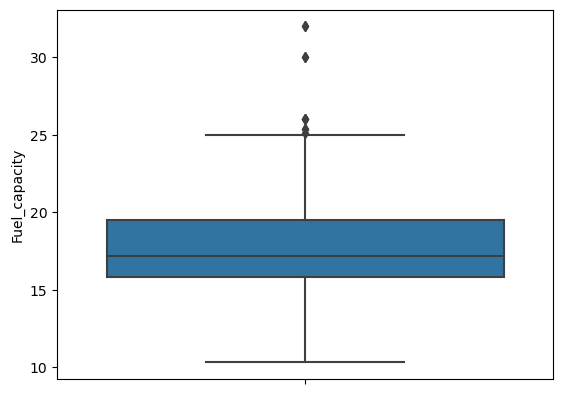

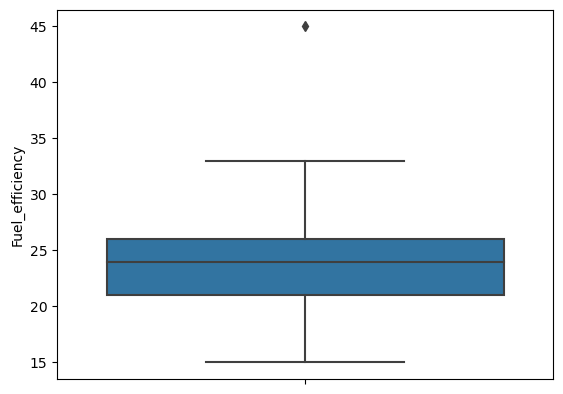

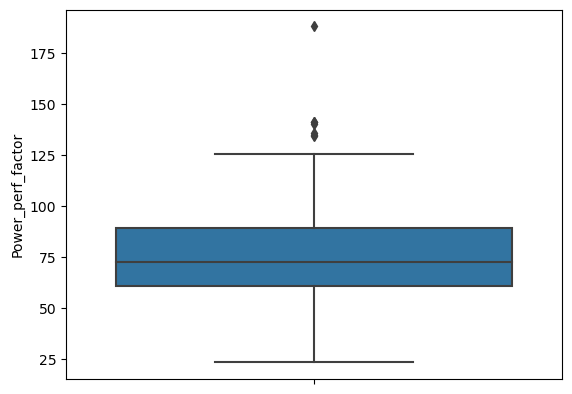

In [11]:
for i in data.columns:
    if data[i].dtypes != "object":
        sns.boxplot(y = data[i] )
        plt.show();

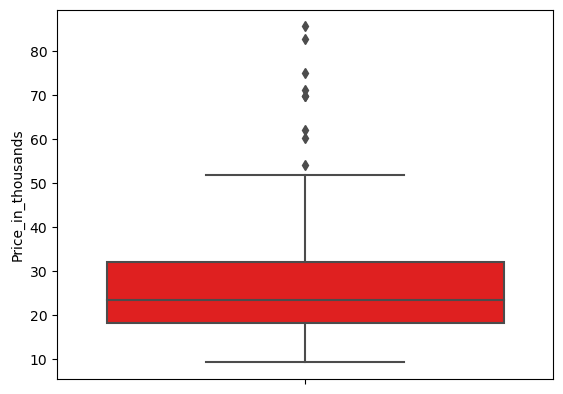

In [12]:
sns.boxplot(data=data, y='Price_in_thousands', color='red')
plt.show()

#### outlier treatment 

In [13]:
def outlier_limit(col):
    Q3, Q1 = np.nanpercentile (col, [75,25])
    IQR = Q3 - Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*IQR
    return UL,LL

In [14]:
UL,LL = outlier_limit(data['Price_in_thousands'])
data['Price_in_thousands'] = np.where((data['Price_in_thousands']>UL) | (data['Price_in_thousands']<LL),np.nan,data['Price_in_thousands'])

In [15]:
data.isnull().sum()

Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     9
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Latest_Launch          0
Power_perf_factor      0
dtype: int64

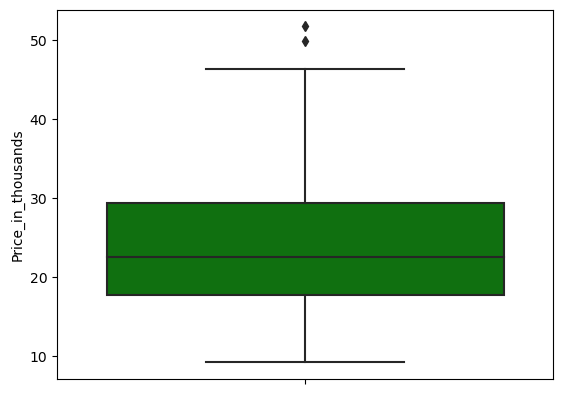

In [16]:
sns.boxplot(data=data, y='Price_in_thousands',color='green');

In [17]:
data.isnull().sum()

Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     9
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Latest_Launch          0
Power_perf_factor      0
dtype: int64

In [18]:
data.dropna(inplace=True)
data

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360000,Passenger,21.500000,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875000,Passenger,28.400000,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225000,Passenger,27.390755,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,77.043591
3,Acura,RL,8.588,29.725000,Passenger,42.000000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255000,Passenger,23.990000,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,18.072975,Passenger,24.400000,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,18.072975,Passenger,27.500000,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,18.072975,Passenger,28.800000,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,18.072975,Passenger,45.500000,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [19]:
data.isnull().sum()

Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Latest_Launch          0
Power_perf_factor      0
dtype: int64

In [20]:
data.shape

(148, 16)

#### Label encoding the categorical columns

In [21]:
le = LabelEncoder()

In [22]:
data['Vehicle_type'] = le.fit_transform(data['Vehicle_type'])

#### Checking the correlation with the target 'Price_in_thousands'

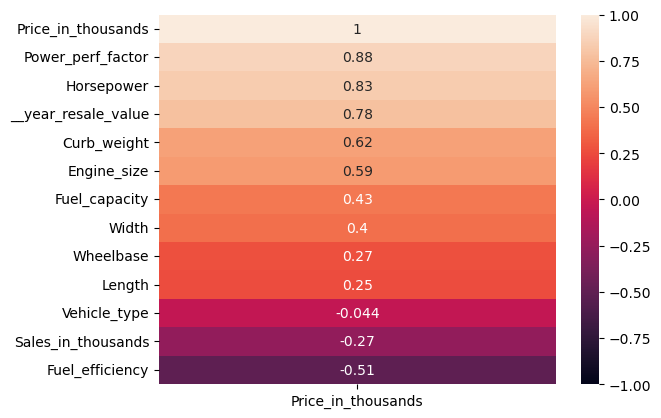

In [23]:
sns.heatmap(data.corr()[["Price_in_thousands"]].sort_values(by="Price_in_thousands", ascending=False), vmin=-1, vmax=1, annot=True)
plt.show()

#### Lets take only the columns with good correlation with the target

In [24]:
x= data[[ '__year_resale_value','Horsepower', 'Power_perf_factor']].values

In [25]:
y = data[['Price_in_thousands']].values

#### Feature Scaling

In [26]:
rs = RobustScaler()

In [27]:
x = rs.fit_transform(x)

#### Model Building

In [28]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor(random_state=0),
}    

In [29]:
for name, model in models.items():
        scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
        print("cross validation model : {}".format(name))
        rmse = np.sqrt(-scores)
        rmse_average = np.mean(rmse)
        print("AVERAGE RMSE: ",rmse_average)
        print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  2.5174303683742574
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  3.3029617343661952
****************************************************************************************************
cross validation model : LinearSVR
AVERAGE RMSE:  4.008172453446391
****************************************************************************************************
cross validation model : DecisionTreeRegressor
AVERAGE RMSE:  4.41223981049915
****************************************************************************************************
cross validation model : GradientBoostingRegressor
AVERAGE RMSE:  3.766292453104799
****************************************************************************************************
cross validation model : AdaBoostRegressor
AVERAGE RMSE:  4.028055108988921
***********************************************

#### Initialising the model

In [30]:
model = LinearRegression()

#### Splitting the data into training and testing sets

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=47, shuffle=True)

#### Fitting the model with training data

In [46]:
model.fit(x_train, y_train)

LinearRegression()

#### Predicting using the test data

In [47]:
y_pred = model.predict(x_test)

#### Evaluating the accuracy

In [48]:
r2_score(y_test, y_pred)

0.9753924282023527

#### Creating a dataframe with y_test and y_pred

In [49]:
OUTPUT = pd.DataFrame(zip(y_test, y_pred), columns=['ACTUAL', 'PREDICTION'],dtype=float)

In [50]:
OUTPUT.head()

,ACTUAL,PREDICTION
0,25.300,27.738561
1,21.500,20.795092
2,22.195,24.519962
3,33.950,33.110112
4,39.665,41.144203


#### Plotting the result

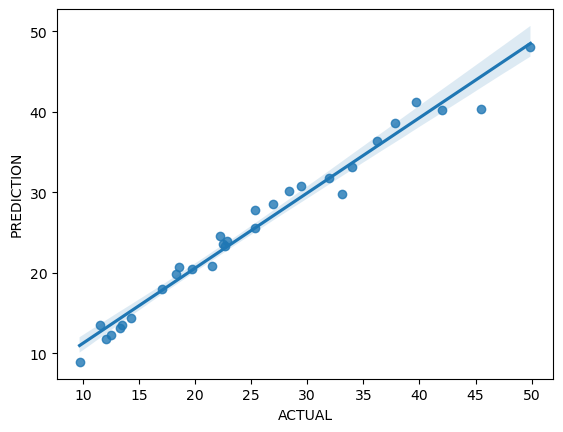

In [51]:
sns.regplot(data=OUTPUT, x='ACTUAL', y='PREDICTION')
plt.show()